**Задание**  
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [72]:
result = differential_evolution(ackley, bounds, seed=42, tol=.01)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

[7, 7, 7, 29, 39, 100, 99, 87, 97, 101, 97, 89, 96, 96, 99, 90]


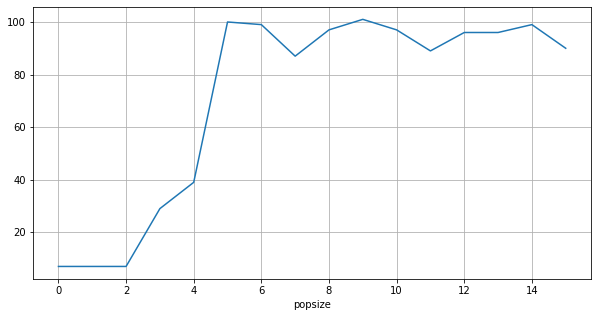

In [37]:
x = np.arange(0, 16)
y = []
for i in x:
    y.append(differential_evolution(ackley, bounds, seed=42, popsize=i).nit)
print(y)
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('popsize')
plt.grid()
plt.show()

In [21]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
ys = []
for i, s in enumerate(strategies):
    ys.append(differential_evolution(ackley, bounds, seed=42, strategy=s).nit)
    print(i, s, ys[i])

0 best1bin 90
1 best1exp 140
2 rand1exp 241
3 randtobest1exp 160
4 currenttobest1exp 1000
5 best2exp 244
6 rand2exp 363
7 randtobest1bin 101
8 currenttobest1bin 1000
9 best2bin 166
10 rand2bin 232
11 rand1bin 168


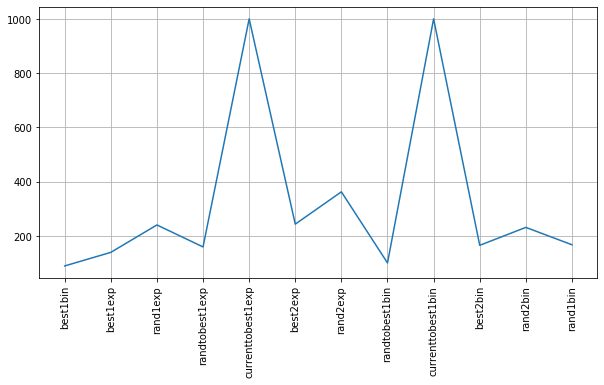

In [38]:
plt.figure(figsize=(10,5))
plt.plot(strategies, ys)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [88]:
xt = np.linspace(0.01, 0.4, 20)
yt = []
for x in xt:
    yt.append(differential_evolution(ackley, bounds, seed=42, tol=x).nit)

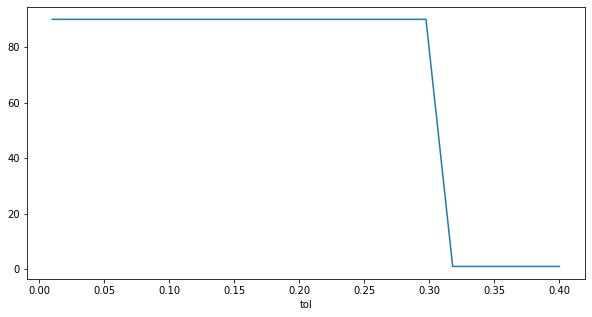

In [90]:
plt.figure(figsize=(10,5))
plt.plot(xt, yt)
plt.xlabel('tol')
plt.show()

In [92]:
xm = np.linspace(0, 1.99, 50)
ym = []
for x in xm:
    ym.append(differential_evolution(ackley, bounds, seed=42, mutation=x).nit)

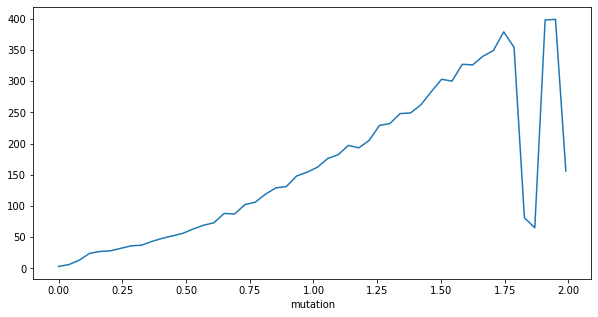

In [94]:
plt.figure(figsize=(10,5))
plt.plot(xm, ym)
plt.xlabel('mutation')
plt.show()

In [98]:
xr = np.linspace(0, 1, 50)
yr = []
for x in xr:
    yr.append(differential_evolution(ackley, bounds, seed=42, recombination=x).nit)

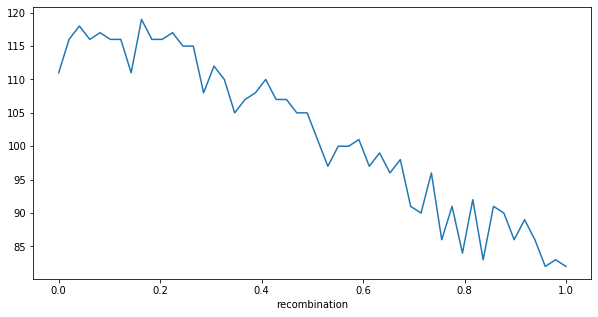

In [99]:
plt.figure(figsize=(10,5))
plt.plot(xr, yr)
plt.xlabel('recombination')
plt.show()

In [103]:
updating_values = ['immediate', 'deferred']
yu = []
for u in updating_values:
    yu.append(differential_evolution(ackley, bounds, seed=42, updating=u).nit)
yu

[90, 122]

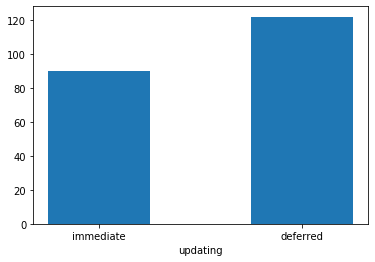

In [118]:
plt.figure(figsize=(6,4))
plt.bar(updating_values, yu, width = 0.5)
plt.xlabel('updating')
plt.show()